<a href="https://colab.research.google.com/github/geraldm24/DS-Unit-1-Sprint-2-Statistics/blob/master/Module3_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# True Probability Rate:100%
pos_rate_user = 1
  # Prior Probability
pop_rate = 1/1000
  # False Positive Rate: 8%
false_pos_rate = .08
  # True Positive Rate for our Prior
prob_drunk_prior = 1 - pop_rate

def prob_drunk_given_positive(pop_rate, false_pos_rate, pos_rate_user):
  # true positive rate for prior give us our 1st detection as it is looped again
  # it replaces our old prior probability to build towards true probability using bayes rule
  prob_drunk_prior = 1 - pop_rate 

  numerator = pos_rate_user*pop_rate
  denominator = (pos_rate_user)*(pop_rate) + (false_pos_rate)*(prob_drunk_prior)
  return (numerator / denominator)
 
# in order to iterate the above function we must make a for loop
prior = 1/1000
drunk_detect = []
for i in range(0,9):
  prior = prob_drunk_given_positive(prior,.08,1)
  drunk_detect.append(prior)
  

In [3]:
drunk_detect

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077]

## Resources

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [5]:
stats.bayes_mvs

<function scipy.stats.morestats.bayes_mvs>

In [6]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-20 20:02:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-02-20 20:02:57 (631 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [7]:
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [8]:
df = df.replace({'y': 1, 'n': 0, '?':np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = df[df['party'] == 'republican']
demo = df[df['party'] == 'democrat']

In [0]:
bills = list(df.columns)
bills.remove('party')

In [11]:
df[bills]

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


In [0]:
rep_set = (rep[bills]) 
demo_set = (demo[bills])


In [0]:
def mean_moe(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.nanmean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  stderr = stats.sem(sample, nan_policy='omit')
  # I want the sample standard deviation
  #stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean, margin_of_error

In [0]:
def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  
  # What is my estimate  - the mean
  mean = np.nanmean(sample)
   # Sample Size
  n = len(sample)
  # standard error
  #stderr = stats.sem(sample, nan_policy='omit')
  # I want the sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
 
  return mean - margin_of_error, mean, mean + margin_of_error

In [15]:
rep[bills]

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
430,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
432,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


In [16]:
demo[bills].head()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   START = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
   
  


In [18]:
confidence_intervals = []
for column in rep_set:
  col = rep_set[column]
  col_cleaned = col[~np.isnan(rep_set[column])]
  confidence_intervals.append(mean_moe(col_cleaned))
confidence_intervals

[(0.18787878787878787, 0.0602271234307087),
 (0.5067567567567568, 0.08149104629696514),
 (0.13414634146341464, 0.052711140146438996),
 (0.9878787878787879, 0.01687204304831233),
 (0.9515151515151515, 0.03311720637798161),
 (0.8975903614457831, 0.046602875442389065),
 (0.24074074074074073, 0.06653984804366711),
 (0.15286624203821655, 0.05691147045695098),
 (0.11515151515151516, 0.04921665607869251),
 (0.5575757575757576, 0.07657979836544149),
 (0.1320754716981132, 0.053199906458443705),
 (0.8709677419354839, 0.05336594843254465),
 (0.8607594936708861, 0.05457359650883327),
 (0.9813664596273292, 0.021112942082731137),
 (0.08974358974358974, 0.04534923473357592),
 (0.6575342465753424, 0.07788820497097171)]

In [24]:
mean, var, std = stats.bayes_mvs(confidence_intervals, alpha=.95)


print(color.DARKCYAN + "Bayes MVS".format(confidence_intervals).center(90,"-"))
print(color.PURPLE + color.START + "mean:" + color.END, mean)
print(color.PURPLE + color.START + "var:" + color.END, var)
print(color.PURPLE + color.START + "std:"+ color.END, std)


----------------------------------------Bayes MVS-----------------------------------------
mean: Mean(statistic=0.286572077705322, minmax=(0.18239807044697334, 0.3907460849636707))
var: Variance(statistic=0.1291300150165018, minmax=(0.08324423384167086, 0.19422510409867627))
std: Std_dev(statistic=0.35626275640755045, minmax=(0.2885207684754615, 0.4407097730918572))


In [26]:
# this is the frequentist method for finding mean and margins or error
lower_bound, mean, upper_bound = confidence_interval(confidence_intervals)
print("lower bound:", lower_bound)
print("mean", mean)
print("upper bound:", upper_bound)
CI_Rep = confidence_interval(confidence_intervals) 

lower bound: 0.10136958905143476
mean 0.286572077705322
upper bound: 0.4717745663592092


In [21]:
confidence_intervals = pd.DataFrame(confidence_intervals)
confidence_intervals.columns = ['mean', 'moe']
confidence_intervals

,mean,moe
0,0.187879,0.060227
1,0.506757,0.081491
2,0.134146,0.052711
3,0.987879,0.016872
4,0.951515,0.033117
5,0.897590,0.046603
6,0.240741,0.066540
7,0.152866,0.056911
8,0.115152,0.049217
9,0.557576,0.076580


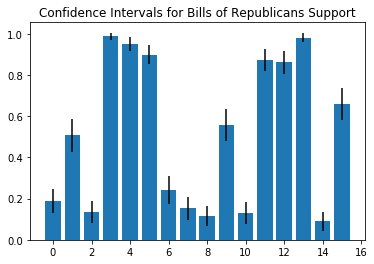

In [22]:
plt.bar(x=range(0, len(confidence_intervals)), height=confidence_intervals['mean'], yerr=confidence_intervals['moe'])
plt.title('Confidence Intervals for Bills of Republicans Support')
plt.show()

In [25]:
CI, _, _ = stats.bayes_mvs(confidence_intervals, alpha=.95)
CI             

Mean(statistic=0.286572077705322, minmax=(0.16126276828942168, 0.41188138712122235))

Bayesian Statistics can be expressed by making a decision based on prior knowledge of the world. As you are presented with new information you then make a decision with that knowledge as well.
Frequentist Statistics is expressed by making a decision based on a sample mean and using that probability to make a decision.  

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!